In [4]:
using Plots
using ProgressMeter
using Random
using Revise

In [10]:
using ParticleInCell

const dt = 0.005     # Time step
const nt = 10000     # Number of time steps
const L  = 20π        #  Domain size 
const nx = 320       # Number of grid cells
const np = nx * 20   # Number of particles


6400

In [16]:
mesh = Mesh1D( 0, 20π, nx)
rng = MersenneTwister(42)
poisson = Poisson1D( mesh )
particles = tsi(rng, mesh, np )
pm = ParticleMeshCoupling1D(particles, mesh)

ParticleMeshCoupling1D(6400, 320, 0.19634954084936207, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  6391, 6392, 6393, 6394, 6395, 6396, 6397, 6398, 6399, 6400])

In [21]:
function main()

    mesh = Mesh1D( 0, 20π, nx)
    poisson = Poisson1D( mesh )
    rng = MersenneTwister(42)
    particles = tsi(rng, mesh, np )
    pm = ParticleMeshCoupling1D(particles, mesh)
    b = Progress(nt+1)
    energy = Float64[]
    e = zeros(Float64, nx)
    ρ = zeros(Float64, nx)
    
    for it in 1:nt+1
        update_positions!(particles, mesh, dt) 
        mat = compute_coeffs(pm, particles)
        compute_rho!(ρ, mat, mesh, particles)
        solve!(e, poisson, ρ)
        update_velocities!(particles, e, mat, dt)
        push!(energy, 0.5 * sum(e.^2) * mesh.dx) 
        next!(b)
    end
    energy
end

@time results = main();

Progress: 100%|█████████████████████████████████████████| Time: 0:00:27


 27.252939 seconds (823.37 M allocations: 22.754 GiB, 8.09% gc time)


In [22]:
results

10001-element Array{Float64,1}:
  0.6055128502013428
  0.6054806436732268
  0.605416901708451
  0.6053215864378895
  0.6051947553568945
  0.6050363588056252
  0.6048464376157997
  0.6046250749748376
  0.6043721598983782
  0.6040878344251799
  0.6037721591264514
  0.6034250044064576
  0.6030465924285456
  ⋮
 16.368301547103957
 16.38567877358345
 16.40299724982335
 16.420098290152996
 16.43722843575927
 16.45431045063816
 16.471237234410793
 16.488210264976495
 16.505132996427196
 16.522071418363513
 16.539034085218464
 16.5557290123096

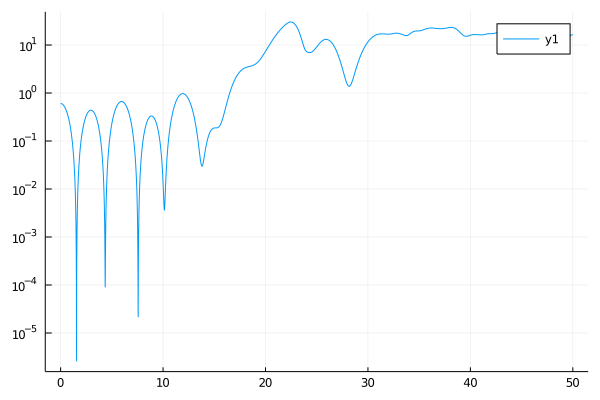

In [23]:
# +
t = (0:nt) .* dt

plot( t, results, yaxis=:log)
# -